# Delta Band PFC Theta Band HPC EMG Like Analysis

An EMG-like signal, often referred to as EMG (Electromyography) signal, is a type of biological signal that represents the electrical activity generated by the contraction of muscle fibers in the human body. EMG signals are commonly used in various fields, including physiology, rehabilitation, and biomedical engineering, to study muscle function and activity.

EMG signals are typically measured in microvolts (µV) and represent the electrical activity of muscles. They consist of electrical potentials generated by the depolarization of muscle cells during muscle contraction. EMG signals are often characterized by their amplitude, frequency content, and duration.

EMG signals are generated when a muscle contracts or when there is muscle activity, including voluntary and involuntary contractions. The level of activity can vary from subtle muscle twitches to strong contractions.

In [1]:
from scipy.io import loadmat
lfp_buz_features = loadmat('synthesised-features/lfp_buz_features_rgs14.mat')

In [2]:
lfp_buz_features.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lfpFeatures'])

In [3]:
lfp_buz_features['lfpFeatures'];

In [4]:
import pandas as pd
import numpy as np

lfp_matrix = np.array(lfp_buz_features['lfpFeatures'])

numColumns = len(lfp_matrix[0])

delta_pfc_df = pd.DataFrame(lfp_matrix[:, 0], columns=["DeltaPFC"])
theta_hpc_df = pd.DataFrame(lfp_matrix[:, 1], columns=["ThetaHPC"])
emg_like_df = pd.DataFrame(lfp_matrix[:, 4], columns=["EMGLike"])

timesteps = 4216

In [5]:
delta_pfc_df['Timestep'] = range(1, timesteps + 1)
delta_pfc_df.set_index('Timestep', inplace=True)

theta_hpc_df['Timestep'] = range(1, timesteps + 1)
theta_hpc_df.set_index('Timestep', inplace=True)

emg_like_df['Timestep'] = range(1, timesteps + 1)
emg_like_df.set_index('Timestep', inplace=True)

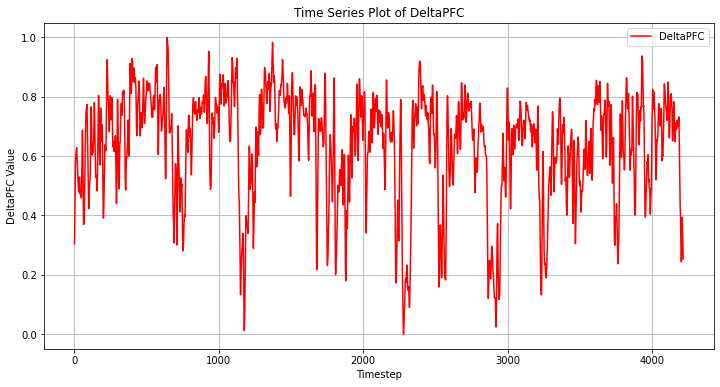

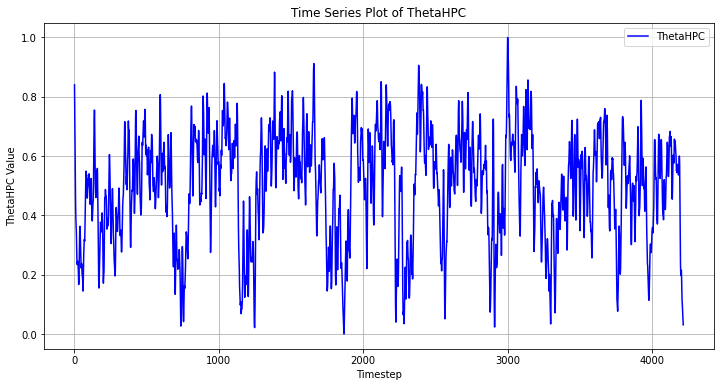

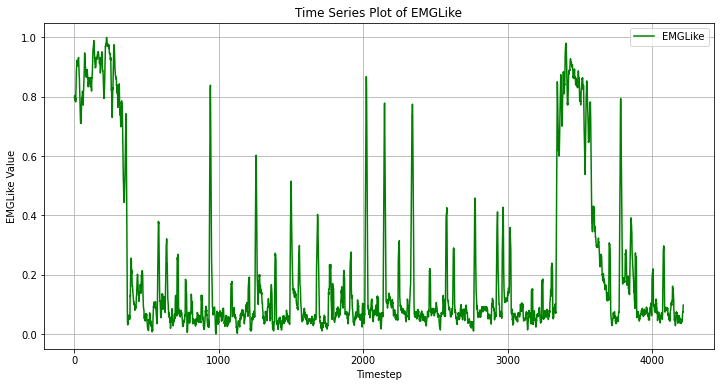

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaPFC'], label='DeltaPFC', color='red')
plt.title('Time Series Plot of DeltaPFC')
plt.xlabel('Timestep')
plt.ylabel('DeltaPFC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaHPC'], label='ThetaHPC', color='blue')
plt.title('Time Series Plot of ThetaHPC')
plt.xlabel('Timestep')
plt.ylabel('ThetaHPC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')
plt.title('Time Series Plot of EMGLike')
plt.xlabel('Timestep')
plt.ylabel('EMGLike Value')
plt.legend()
plt.grid(True)
plt.show()

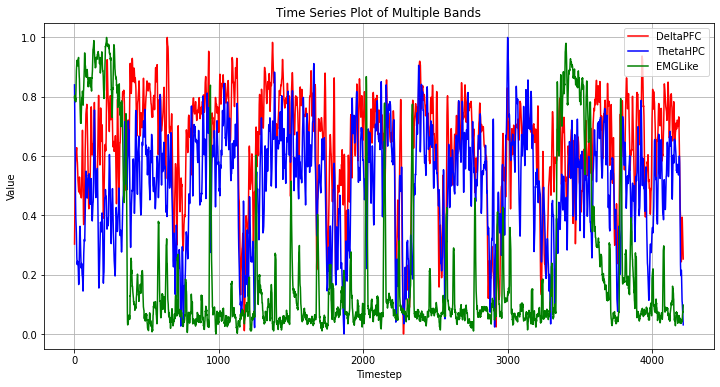

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaPFC'], label='DeltaPFC', color='red')

plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaHPC'], label='ThetaHPC', color='blue')

plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')

plt.title('Time Series Plot of Multiple Bands')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

In [8]:
data = {
    'DeltaPFC': delta_pfc_df.to_numpy().flatten(),
    'ThetaHPC': theta_hpc_df.to_numpy().flatten(),
    'EMGLike': emg_like_df.to_numpy().flatten()
}

In [9]:
print(f"Head: {delta_pfc_df['DeltaPFC'].head()}\n")
print(f"Min:  {delta_pfc_df.min()}\n")
print(f"Max:  {delta_pfc_df.max()}\n")
print(f"Sum:  {delta_pfc_df.sum()}\n")
print(f"Sum:  {data['DeltaPFC'].sum()}\n")

Head: Timestep
1    0.303216
2    0.349171
3    0.393067
4    0.436004
5    0.478701
Name: DeltaPFC, dtype: float64

Min:  DeltaPFC    0.0
dtype: float64

Max:  DeltaPFC    1.0
dtype: float64

Sum:  DeltaPFC    2681.256131
dtype: float64

Sum:  2681.2561308126933



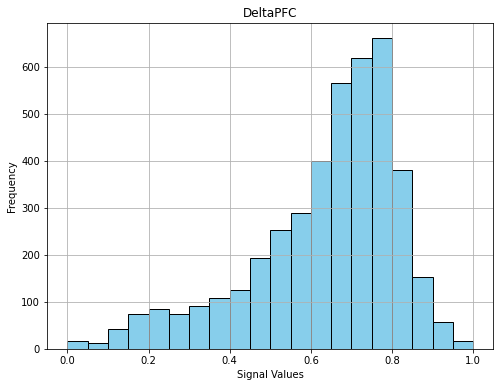

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(delta_pfc_df['DeltaPFC'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('DeltaPFC')
plt.grid(True)
plt.show()

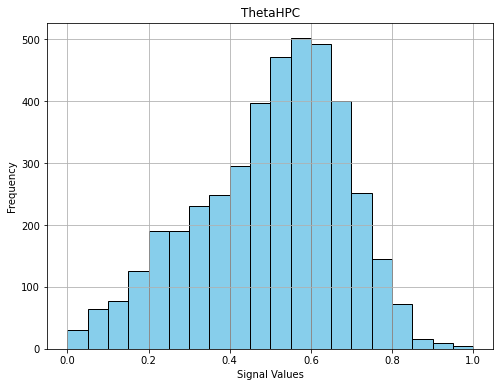

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(theta_hpc_df['ThetaHPC'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('ThetaHPC')
plt.grid(True)
plt.show()

In [12]:
print(f"Head: {theta_hpc_df.head()}\n")
print(f"Min:  {theta_hpc_df.min()}\n")
print(f"Max:  {theta_hpc_df.max()}\n")
print(f"Sum:  {theta_hpc_df.sum()}\n")
print(f"Sum:  {data['ThetaHPC'].sum()}\n")

Head:           ThetaHPC
Timestep          
1         0.840140
2         0.781924
3         0.725388
4         0.671042
5         0.618650

Min:  ThetaHPC    0.0
dtype: float64

Max:  ThetaHPC    1.0
dtype: float64

Sum:  ThetaHPC    2111.03367
dtype: float64

Sum:  2111.033669611976



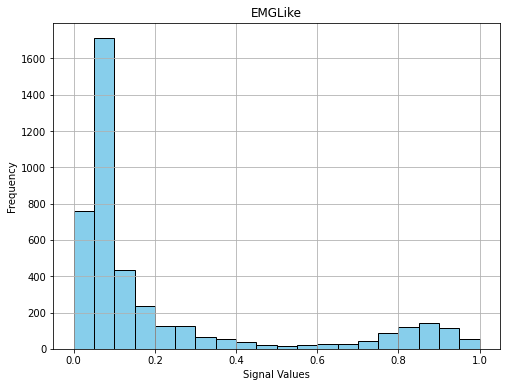

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(emg_like_df['EMGLike']
, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Signal Values')
plt.ylabel('Frequency')
plt.title('EMGLike')
plt.grid(True)
plt.show()

In [14]:
print(f"Head: {emg_like_df.head()}\n")
print(f"Min:  {emg_like_df.min()}\n")
print(f"Max:  {emg_like_df.max()}\n")
print(f"Sum:  {emg_like_df.sum()}\n")
print(f"Sum:  {data['EMGLike'].sum()}\n")

Head:            EMGLike
Timestep          
1         0.800759
2         0.792852
3         0.804405
4         0.788237
5         0.789823

Min:  EMGLike    0.0
dtype: float64

Max:  EMGLike    1.0
dtype: float64

Sum:  EMGLike    905.898864
dtype: float64

Sum:  905.8988643570337



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


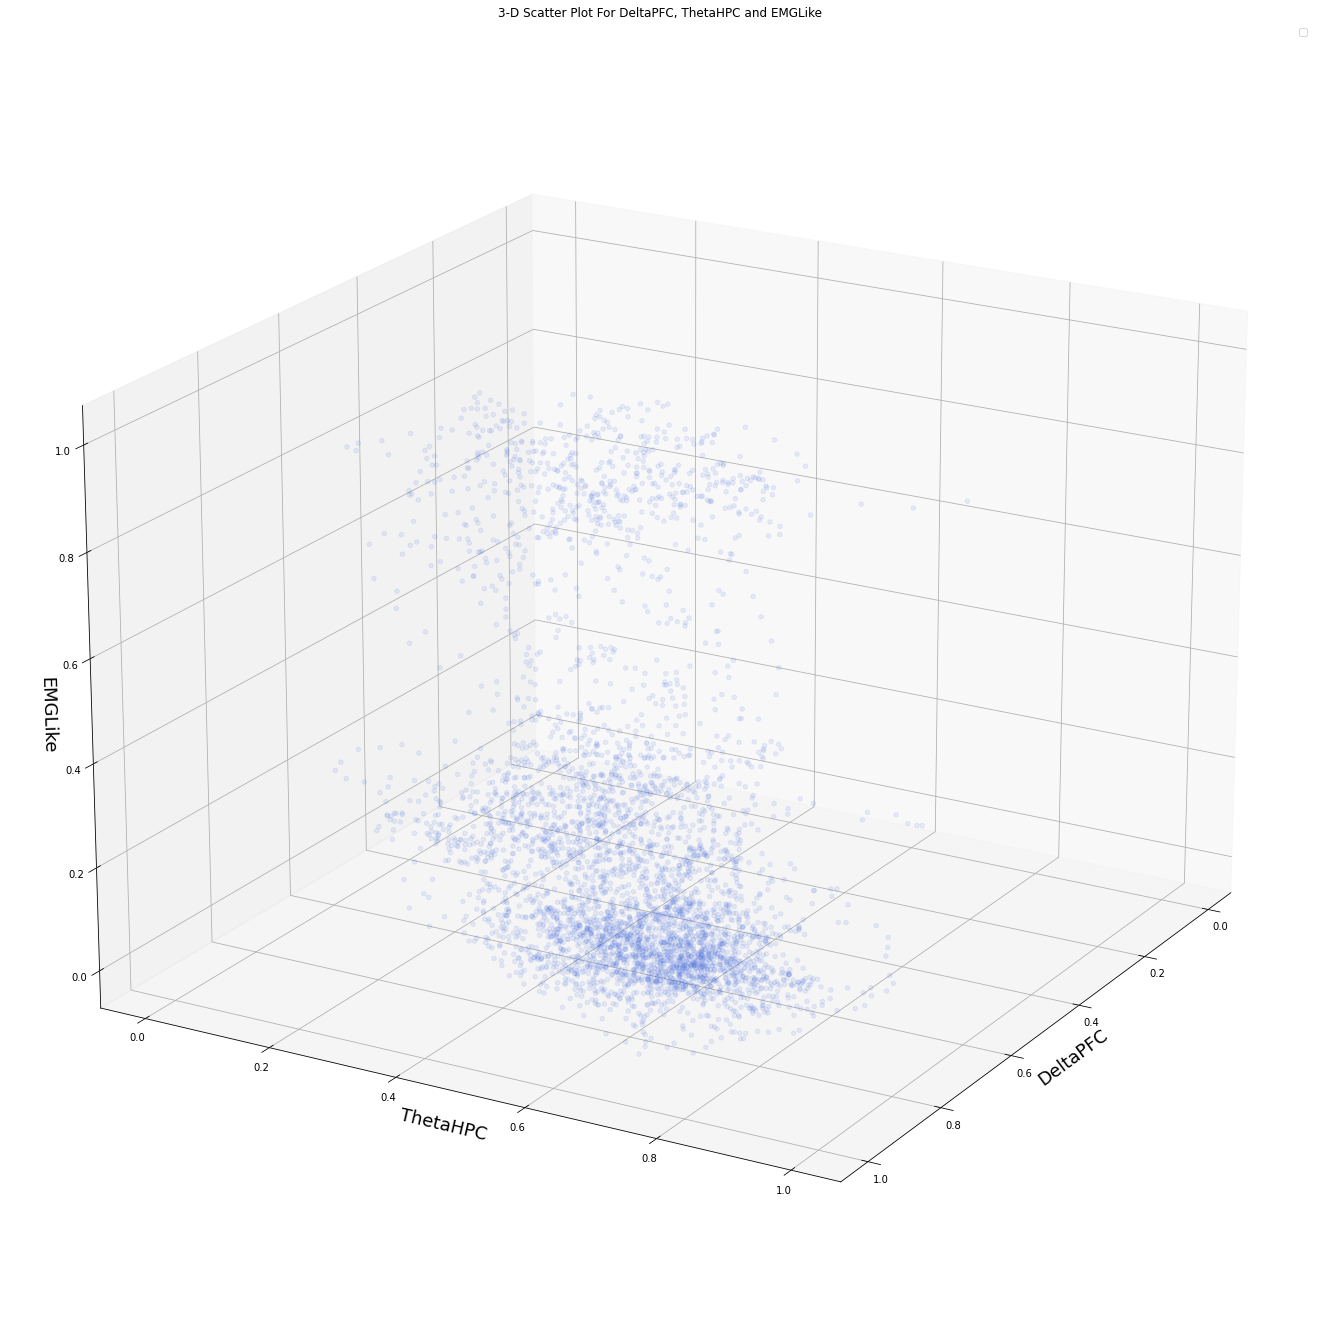

In [15]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams.update({'font.size': 18})

fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    delta_pfc_df['DeltaPFC'], 
    theta_hpc_df['ThetaHPC'],
    emg_like_df['EMGLike'],
    # pd.DataFrame({'Column1': [0.0] * 10820}), 
    # pd.DataFrame({'Column1': [0.0] * 10820}), 
    c='royalblue', 
    alpha=0.1
)

ax.set_xlabel('DeltaPFC', fontsize=18)
ax.set_ylabel('ThetaHPC', fontsize=18)
ax.set_zlabel('EMGLike', fontsize=18)
ax.set_title('3-D Scatter Plot For DeltaPFC, ThetaHPC and EMGLike')
ax.legend()
ax.view_init(elev=20, azim=30)
plt.savefig('feature-plots/delta-theta-emg.png', dpi=300, bbox_inches='tight')
# plt.show()

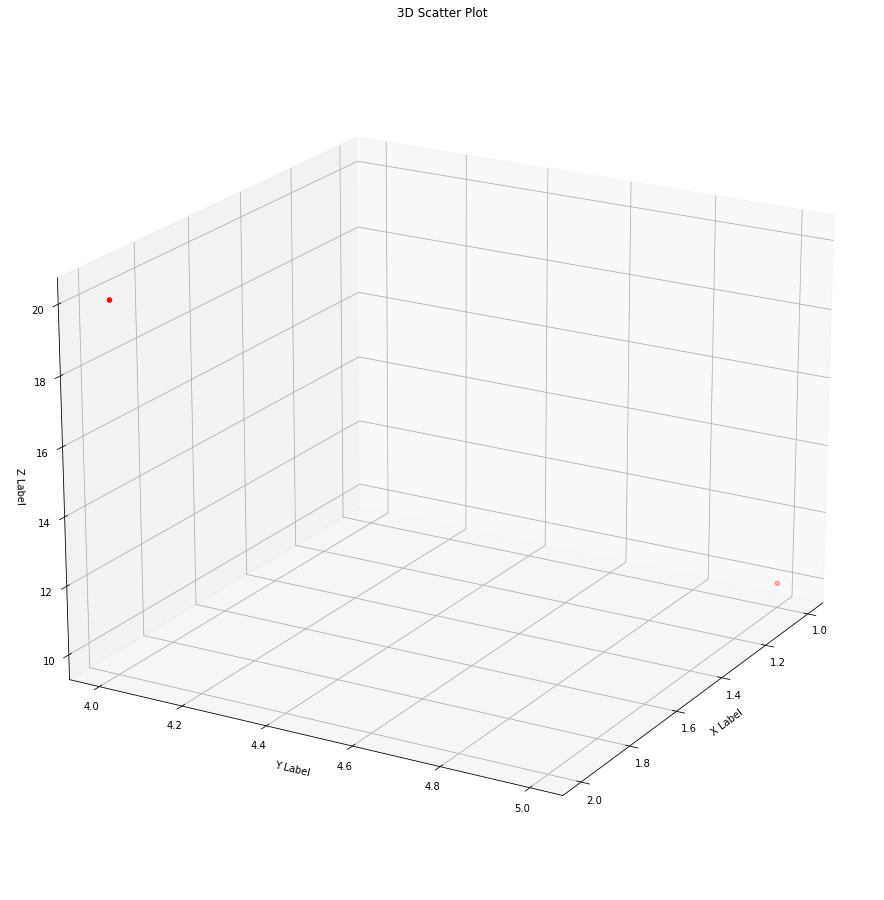

In [16]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')

x = [1, 2]
y = [5, 4]
z = [10, 20]

ax.scatter(x, y, z, c='r', marker='o')  # Customize color and marker style as needed


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_title('3D Scatter Plot')
ax.view_init(elev=20, azim=30)